In [ ]:
# 크롤링 정책
# robots.txt : 웹페이지의 크롤링 정책 설명한 페이지
# 크롤링법 X : 과도한 크롤링으로 서비스에 영향을 주었을경우 업무방해 혐의로 고소당할수 있음
# 법적문제 : 지적 재산권, 서비스 과부화, 데이터 사용 표준
# API 사용 : 데이터를 가지고 있는 업체에서 데이터를 가져갈수 있도록 하는 서비스

### Naver Rest API
- 파파고 번역 api
- 통합검색어 트렌드 api

In [53]:
import pandas as pd
import requests, json

#### 0. request token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [6]:
CLIENT_ID, CLIENT_SECRET = '6UJjfsjGSKlAJqme_T30', '6JIQkpOD06'

#### 1. 파파고 번역 api
- `https://developers.naver.com/docs/papago/`
- 사용법
    - `https://developers.naver.com/docs/papago/papago-nmt-api-reference.md`

In [2]:
# 1. API 문서 : URL

In [8]:
ko_txt = '웹크롤링은 재미있습니다.'
url = 'https://openapi.naver.com/v1/papago/n2mt'
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET,
}
params = {'source': 'ko', 'target': 'en', 'text': ko_txt}

In [4]:
# 2. request(URL,key,ko_txt) > response : json(str)

In [15]:
json.dumps(params)

'{"source": "ko", "target": "en", "text": "\\uc6f9\\ud06c\\ub864\\ub9c1\\uc740 \\uc7ac\\ubbf8\\uc788\\uc2b5\\ub2c8\\ub2e4."}'

In [13]:
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [33]:
response.text

'{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Web crawling is fun.","engineType":"N2MT","pivot":null,"dict":null,"tarDict":null,"modelVer":"Unknown"},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}'

In [5]:
# 3. json(str) : en_txt

In [38]:
en_txt = response.json()['message']['result']['translatedText']
en_txt

'Web crawling is fun.'

In [21]:
# 4. make function
def translate(txt, source='ko', target='en'):
    CLIENT_ID, CLIENT_SECRET = '6UJjfsjGSKlAJqme_T30', '6JIQkpOD06'
    url = 'https://openapi.naver.com/v1/papago/n2mt'
    headers = {
        'Content-Type': 'application/json',
        'X-Naver-Client-Id': CLIENT_ID,
        'X-Naver-Client-Secret': CLIENT_SECRET,
    }
    params = {'source': source, 'target': target, 'text': txt}
    response = requests.post(url, json.dumps(params), headers=headers)
    return response.json()['message']['result']['translatedText']

In [22]:
translate('데이터 사이언스는 재미있습니다.')

'Data Science is fun.'

In [24]:
df = pd.DataFrame({
    'id': list('AB'),
    'title': ['인공지능 스쿨 화이팅', '데이터 크롤링'],
})
df

,id,title
0,A,인공지능 스쿨 화이팅
1,B,데이터 크롤링


In [27]:
df['en_title'] = df['title'].apply(translate)
df

,id,title,en_title
0,A,인공지능 스쿨 화이팅,"AI school, fighting!"
1,B,데이터 크롤링,Crawling data


In [30]:
df.to_excel('en_title.xlsx', index=False, encoding='utf-8-sig')

In [31]:
%ls

 C 드라이브의 볼륨: 로컬 디스크
 볼륨 일련 번호: 8A64-4954

 C:\Users\User\web_crawling 디렉터리

2023-02-16  오후 04:18    <DIR>          .
2023-02-16  오후 04:18    <DIR>          ..
2023-02-16  오후 03:12    <DIR>          .ipynb_checkpoints
2023-02-16  오후 02:52           122,688 01_requests_naver_stock.ipynb
2023-02-16  오후 03:12            13,357 02_requests_daum_exchange.ipynb
2023-02-16  오후 04:18            10,831 03_naver_api.ipynb
2023-02-16  오후 04:18             5,534 en_title.xlsx
               4개 파일             152,410 바이트
               3개 디렉터리  351,752,474,624 바이트 남음


In [32]:
pd.read_excel('en_title.xlsx')

,id,title,en_title
0,A,인공지능 스쿨 화이팅,"AI school, fighting!"
1,B,데이터 크롤링,Crawling data


#### 2. 통합검색어 트렌드 api
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [44]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [45]:
%whos

Interactive namespace is empty.


In [46]:
CLIENT_ID, CLIENT_SECRET = '6UJjfsjGSKlAJqme_T30', '6JIQkpOD06'

In [47]:
%whos

Variable        Type    Data/Info
---------------------------------
CLIENT_ID       str     6UJjfsjGSKlAJqme_T30
CLIENT_SECRET   str     6JIQkpOD06


In [39]:
# 1. API 문서 : URL

In [49]:
url = 'https://openapi.naver.com/v1/datalab/search'
params = {
    'startDate': '2018-01-01',
    'endDate': '2023-02-16',
    'timeUnit': 'month',
    'keywordGroups': [
        {'groupName': '트위터', 'keywords': ['트위터', '트윗']},
        {'groupName': '페이스북', 'keywords': ['페이스북', '페북']},
        {'groupName': '인스타그램', 'keywords': ['인스타그램', '인스타']},
    ]
}

In [50]:
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET,
}

In [40]:
# 2. request(URL) > response : json(str)

In [54]:
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [41]:
# 3. json(str) > list, dict > DataFrame

In [58]:
results = response.json()['results']
type(results)

list

In [68]:
# columns : period, ratio, title
dfs = []
for result in results:
    df = pd.DataFrame(result['data'])
    df['title'] = result['title']
    dfs.append(df)

In [73]:
result_df = pd.concat(dfs, ignore_index=True)
result_df.tail(2)

,period,ratio,title
184,2023-01-01,20.30135,인스타그램
185,2023-02-01,10.55313,인스타그램


In [ ]:
# column : title(twitter, facebook, instargram)
# index : period
# value : ratio

In [75]:
pivot_df = result_df.pivot('period', 'title', 'ratio')
pivot_df.tail(2)

title,인스타그램,트위터,페이스북
period,,,
2023-01-01,20.30135,26.64944,14.87866
2023-02-01,10.55313,13.56007,7.00545


In [78]:
# update : 데이터선택 = 수정할데이터
pivot_df.columns = ['instagram', 'twitter', 'facebook']

In [79]:
pivot_df.tail(2)

,instagram,twitter,facebook
period,,,
2023-01-01,20.30135,26.64944,14.87866
2023-02-01,10.55313,13.56007,7.00545


In [80]:
import matplotlib.pyplot as plt

In [83]:
%config InlineBackend.figure_formats = {'png', 'retina'}

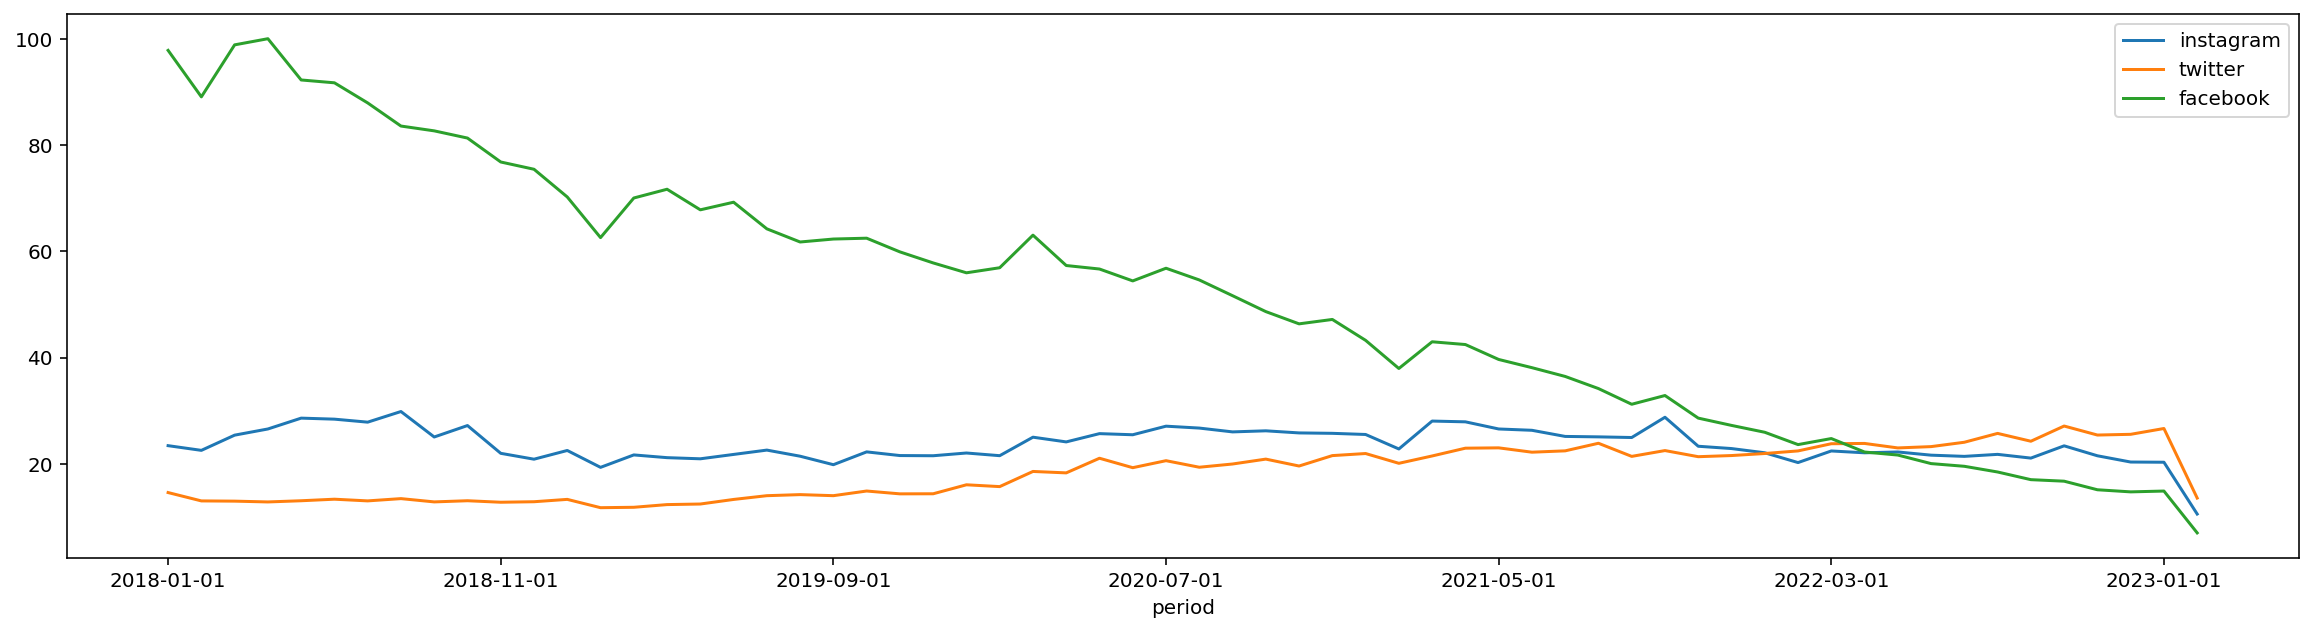

In [84]:
pivot_df.plot(figsize=(20, 5))
plt.show()